In [40]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

font = {'size': 22}

matplotlib.rc('font', **font)

import numpy as np
import pandas as pd

import scipy
import scipy.stats
import seaborn as sns

import sklearn.datasets

import mrob

<AxesSubplot:>

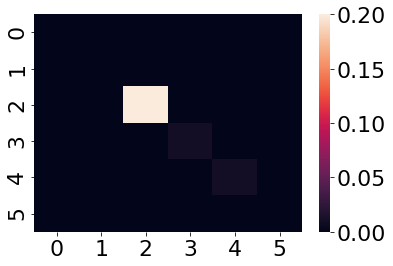

In [41]:
sigma = sklearn.datasets.make_spd_matrix(6)*1e-5
sigma = np.eye(6)
sigma[0,0] = 1e-10
sigma[1,1] = 1e-10
sigma[2,2] = 1e-1
sigma[3,3] = 1e-4
sigma[4,4] = 1e-4
sigma[5,5] = 1e-10

sigma = np.diag([1e-10,1e-10,0.2,1e-2,1e-2,1e-10])

# sigma = sklearn.datasets.make_spd_matrix(6)*1e-5

mu = np.array([0,0,0,0,0,0])
sns.heatmap(sigma)

In [42]:
n = scipy.stats.multivariate_normal(mu,sigma)

In [43]:
n.rvs()

array([-1.03919999e-05,  1.12889659e-05,  2.50976707e-01,  7.62094345e-02,
       -2.18972681e-01, -1.77408341e-05])

<AxesSubplot:>

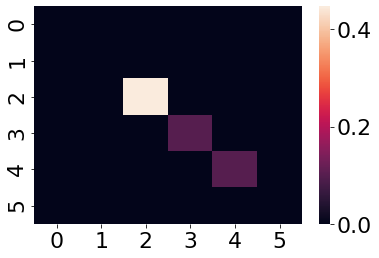

In [5]:
A = np.linalg.cholesky(sigma)
sns.heatmap(A)

In [6]:
def rotate(l, n):
    return l[-n:] + l[:-n]

# X & Y

In [7]:
points = []
points.append([0,0,0,1,0,0])
points.append([0,0,0,-1,0,0])
points.append([0,0,0,0,1,0])
points.append([0,0,0,0,-1,0])


labels = ['+x','-x','+y','-y']
# x = [1,0,0,0,0,0]

# for _ in range(6):
#     points.append(x)
#     x = rotate(x,1)
    
# x = [-1,0,0,0,0,0]

# for _ in range(6):
#     points.append(x)
#     x = rotate(x,1)

N = 100
for i in range(N):
    points.append([0,0,0,1*np.cos(2*np.pi/N*i), 1*np.sin(2*np.pi/N*i),0])

points = np.array(points)
points

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         9.98026728e-01,  6.27905195e-02,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         9.92114701e-01,  1.25333234e-01,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         9.82287251e-01,  1.87381315e-01,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.000

In [8]:
points_img = np.dot(A,points.transpose()).transpose()

In [9]:
points_img

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e-01,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.00000000e-01,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e-01,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -1.00000000e-01,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e-01,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         9.98026728e-02,  6.27905195e-03,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         9.92114701e-02,  1.25333234e-02,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         9.82287251e-02,  1.87381315e-02,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.000

In [10]:
propagated = []


for i in range(len(points_img)):
    tmp = mrob.geometry.SE3([0,0,0,1,0,0])
    tmp.update_lhs(points_img[i])
    propagated.append(tmp)

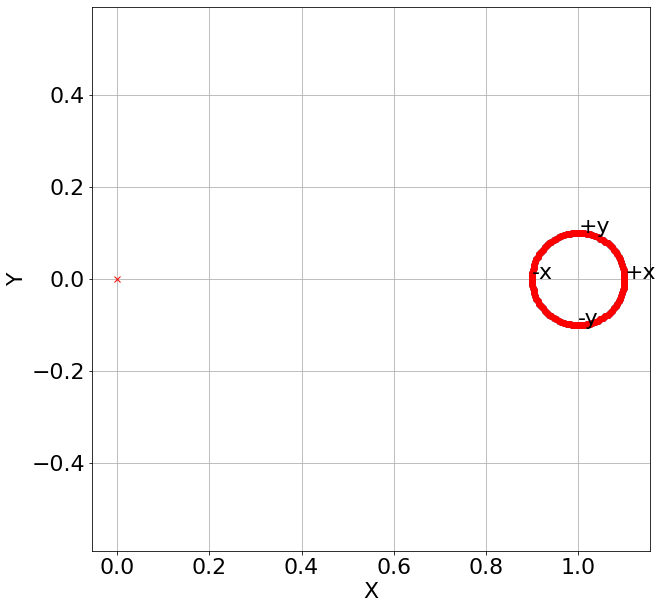

In [11]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

poses = np.array([x.t() for x in propagated])
poses = poses.reshape((-1,3))

plt.scatter(poses[:,0],poses[:,1])

for i in range(len(points_img)):
    plt.plot(poses[i,0],poses[i,1],'o', color='red')
    

for i in range(len(labels)):
    plt.annotate(labels[i],(poses[i,0],poses[i,1]))
    
plt.plot(0,0,'x',color='red')
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.axis('equal')
plt.show()

# yaw & x

In [70]:
N = 100
K = 3

points = []
points.append([0,0,K,0,0,0])
points.append([0,0,-K,0,0,0])
points.append([0,0,0,K,0,0])
points.append([0,0,0,-K,0,0])


labels = ['+yaw','-yaw','+x','-x']
# x = [1,0,0,0,0,0]

# for _ in range(6):
#     points.append(x)
#     x = rotate(x,1)
    
# x = [-1,0,0,0,0,0]

# for _ in range(6):
#     points.append(x)
#     x = rotate(x,1)


for i in range(N):
    points.append([0,0,K*np.cos(2*np.pi/N*i), K*np.sin(2*np.pi/N*i),0,0])

points = np.array(points)
points

array([[ 0.00000000e+00,  0.00000000e+00,  3.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -3.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         3.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -3.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  3.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  2.99408019e+00,
         1.88371559e-01,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  2.97634410e+00,
         3.75999701e-01,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  2.94686175e+00,
         5.62143944e-01,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  2.905

In [71]:
points[:7]

array([[ 0.        ,  0.        ,  3.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        , -3.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  3.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        , -3.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  3.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  2.99408019,  0.18837156,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  2.9763441 ,  0.3759997 ,  0.        ,
         0.        ]])

In [72]:
points_img = np.dot(A,points.transpose()).transpose()

In [73]:
propagated = []


for i in range(len(points_img)):
    tmp = mrob.geometry.SE3([0,0,0,1,1,0])
    tmp.update_lhs(points_img[i])
    propagated.append(tmp)

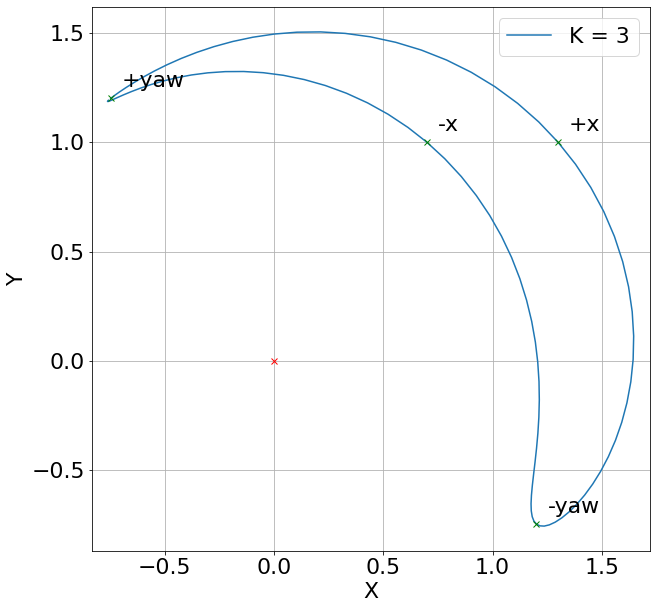

In [74]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

poses = np.array([x.t() for x in propagated])
poses = poses.reshape((-1,3))

# plt.scatter(poses[:,0],poses[:,1])

plt.plot(poses[4:,0],poses[4:,1], label="K = {}".format(K))

for i in range(len(points_img)):
    continue
    plt.plot(poses[i,0],poses[i,1],'o', color='red')
    

for i in range(len(labels)):
    plt.annotate(labels[i],xy = (poses[i,0],poses[i,1]), xytext = (poses[i,0]+0.05,poses[i,1]+0.05))
    plt.plot(poses[i,0],poses[i,1],'x',color='green')
    
plt.plot(0,0,'x',color='red')
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.axis('equal')
plt.legend()
plt.show()

In [152]:
def sigma_visualize(T, sigma, N=100, K=[1,1]):
    N = 100
    labels = ['+yaw','-yaw','+x','-x']
    plt.plot(T.t()[0], T.t()[1],'x')
    A = np.linalg.cholesky(sigma)
    for k in set(K):
#         print(k)
        points = []
        points.append([0,0,k,0,0,0])
        points.append([0,0,-k,0,0,0])
        points.append([0,0,0,k,0,0])
        points.append([0,0,0,-k,0,0])


        for i in range(N+1):
            points.append([0,0,k*np.cos(2*np.pi/N*i), k*np.sin(2*np.pi/N*i),0,0])

        points = np.array(points)
        
        points_img = np.dot(A,points.transpose()).transpose()

        propagated = []

        for i in range(len(points_img)):
            tmp = mrob.geometry.SE3(T)
            tmp.update_lhs(points_img[i])
            propagated.append(tmp)
        poses = np.array([x.t() for x in propagated])
        poses = poses.reshape((-1,3))
        
        plt.plot(poses[4:,0],poses[4:,1], label="K = {}".format(k))
    
        for i in range(len(labels)):
            plt.annotate(labels[i],xy = (poses[i,0],poses[i,1]), xytext = (poses[i,0]+0.01,poses[i,1]+0.01))
            plt.plot(poses[i,0],poses[i,1],'x',color='green')
    
    
        # plotting axis of ellipsoid
        points = []
        points.append([0,0,k,0,0,0])
        points.append([0,0,-k,0,0,0])
        points.append([0,0,0,k,0,0])
        points.append([0,0,0,-k,0,0])


        for i in range(N+1):
            points.append([0,0,k - i*(2*k)/N, 0,0,0])

        points = np.array(points)
        
        points_img = np.dot(A,points.transpose()).transpose()

        propagated = []

        for i in range(len(points_img)):
            tmp = mrob.geometry.SE3(T)
            tmp.update_lhs(points_img[i])
            propagated.append(tmp)
        poses = np.array([x.t() for x in propagated])
        poses = poses.reshape((-1,3))
        
        plt.plot(poses[4:,0],poses[4:,1])
        
        # plotting axis of ellipsoid
        points = []
        points.append([0,0,k,0,0,0])
        points.append([0,0,-k,0,0,0])
        points.append([0,0,0,k,0,0])
        points.append([0,0,0,-k,0,0])


        for i in range(N+1):
            points.append([0,0,0,k - i*(2*k)/N,0,0])

        points = np.array(points)
        
        points_img = np.dot(A,points.transpose()).transpose()

        propagated = []

        for i in range(len(points_img)):
            tmp = mrob.geometry.SE3(T)
            tmp.update_lhs(points_img[i])
            propagated.append(tmp)
        poses = np.array([x.t() for x in propagated])
        poses = poses.reshape((-1,3))
        
        plt.plot(poses[4:,0],poses[4:,1])

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid()
    plt.axis('equal')
    plt.legend()
    plt.show()
        

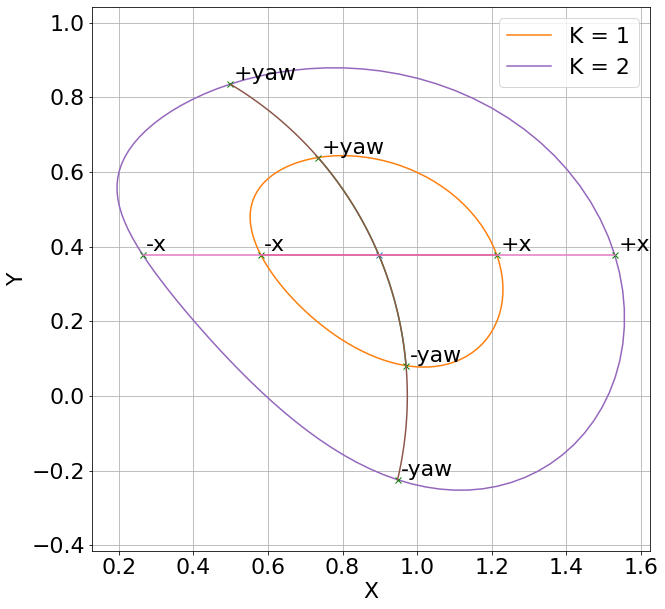

In [192]:
plt.figure(figsize=(10,10))
sigma = np.diag([1e-10,1e-10,0.1,0.1,1e-10,1e-10])
sigma_visualize(mrob.geometry.SE3([0,0,0.8,1,0,0]), sigma=sigma,N = 100, K=range(1,3) )

res = {'xy' : {'cirlce' : points, 'axis1' : points, 'axis2' : points}}